In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(r"C:\Users\DELL\AQI_Forecast_Project\data\raw\city_day.csv\city_day.csv")

In [3]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [5]:
display(df.describe())
print("\n--- Descriptive Statistics ---")

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000



--- Descriptive Statistics ---


In [4]:
print("Converting 'Date' column to datetime format...")
df['Date'] = pd.to_datetime(df['Date'])
print("'Date' column converted successfully.")

Converting 'Date' column to datetime format...
'Date' column converted successfully.


In [5]:
print("\nHandling missing values using forward-fill for each city...")

pollutant_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']


Handling missing values using forward-fill for each city...


In [6]:
df.sort_values(['City', 'Date'], inplace=True)
df[pollutant_cols] = df.groupby('City')[pollutant_cols].ffill()

In [7]:
df[pollutant_cols] = df.groupby('City')[pollutant_cols].bfill()

In [8]:
print(" Missing values imputed.")
print("\n--- Missing Value Counts After Imputation ---")
print(df.isnull().sum())

 Missing values imputed.

--- Missing Value Counts After Imputation ---
City              0
Date              0
PM2.5             0
PM10           2009
NO                0
NO2               0
NOx            1169
NH3            2009
CO                0
SO2               0
O3              162
Benzene        2732
Toluene        4010
Xylene        13047
AQI               0
AQI_Bucket     4681
dtype: int64


In [9]:
df.dropna(inplace=True)
print(f"\nShape of the dataset after dropping any remaining nulls: {df.shape}")


Shape of the dataset after dropping any remaining nulls: (11757, 16)


In [14]:
processed_file_path = r"C:\Users\DELL\AQI_Forecast_Project\data\processed\cleaned_city_day.csv"

In [25]:
df.to_csv(processed_file_path, index=True)
print(f"\n Cleaned data saved successfully to: {processed_file_path}")


 Cleaned data saved successfully to: C:\Users\DELL\AQI_Forecast_Project\data\processed\cleaned_city_day.csv


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
sns.set_theme(style="whitegrid", context="talk")
plt.rcParams['figure.figsize'] = (15, 8)

In [29]:
file_path = r"C:\Users\DELL\AQI_Forecast_Project\data\processed\cleaned_city_day.csv"

In [30]:
df_test = pd.read_csv(file_path)

In [31]:
print("🧾 Columns in the CSV:")
print(df_test.columns.tolist())

🧾 Columns in the CSV:
['Date', 'City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']


In [32]:
df_clean = pd.read_csv(
    r"C:\Users\DELL\AQI_Forecast_Project\data\processed\cleaned_city_day.csv",
    parse_dates=True,
    index_col=0
)


In [33]:
df_clean.index.name = 'Date'
print(" Cleaned dataset loaded successfully!")
print(f"Data ranges from {df_clean.index.min().date()} to {df_clean.index.max().date()}")

 Cleaned dataset loaded successfully!
Data ranges from 2015-01-01 to 2020-07-01


In [34]:
major_cities = ['Delhi', 'Mumbai', 'Kolkata', 'Bengaluru']
df_cities = df_clean[df_clean['City'].isin(major_cities)].copy()

In [35]:
monthly_aqi = df_clean['AQI'].resample('M').mean()

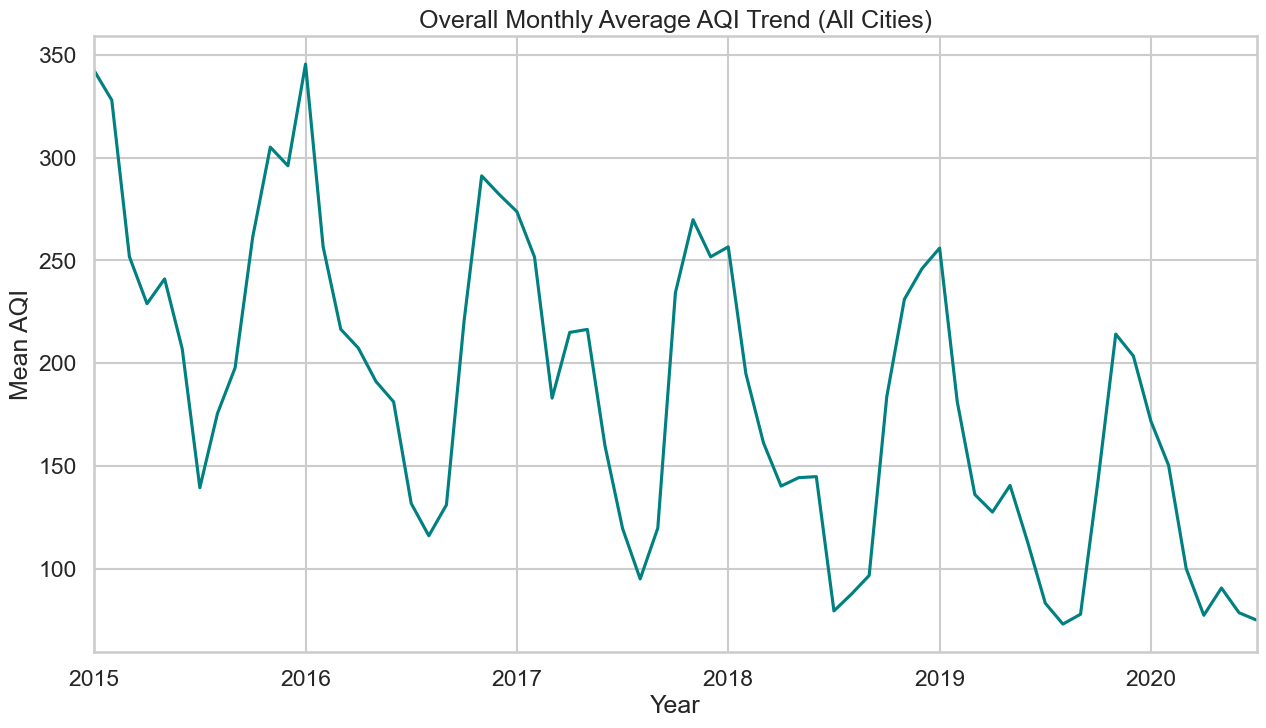

In [36]:
monthly_aqi.plot(title='Overall Monthly Average AQI Trend (All Cities)', color='teal')
plt.ylabel('Mean AQI')
plt.xlabel('Year')
plt.show()

In [37]:
city_avg_aqi = df_cities.groupby('City')['AQI'].mean().sort_values(ascending=False)

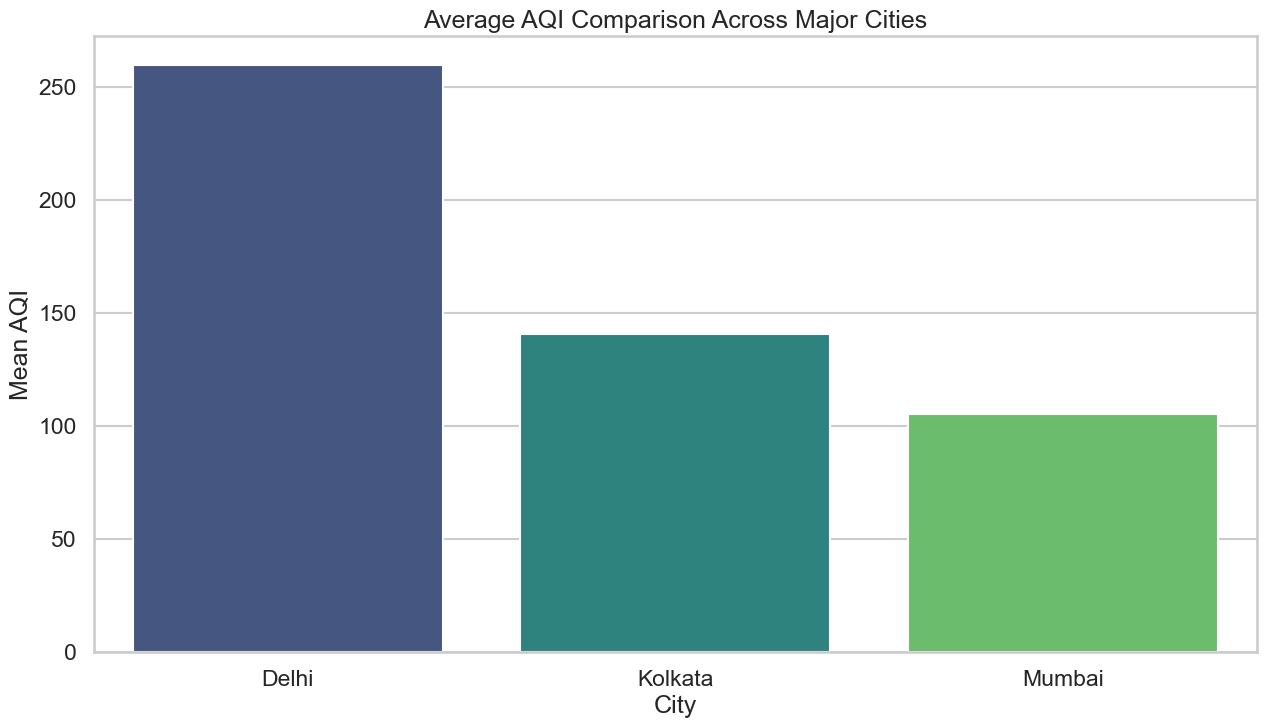

In [38]:
sns.barplot(x=city_avg_aqi.index, y=city_avg_aqi.values, palette='viridis')
plt.title('Average AQI Comparison Across Major Cities')
plt.ylabel('Mean AQI')
plt.xlabel('City')
plt.show()

In [39]:
df_cities['Month'] = df_cities.index.month

In [40]:
monthly_city_aqi = df_cities.groupby(['Month', 'City'])['AQI'].median().unstack()

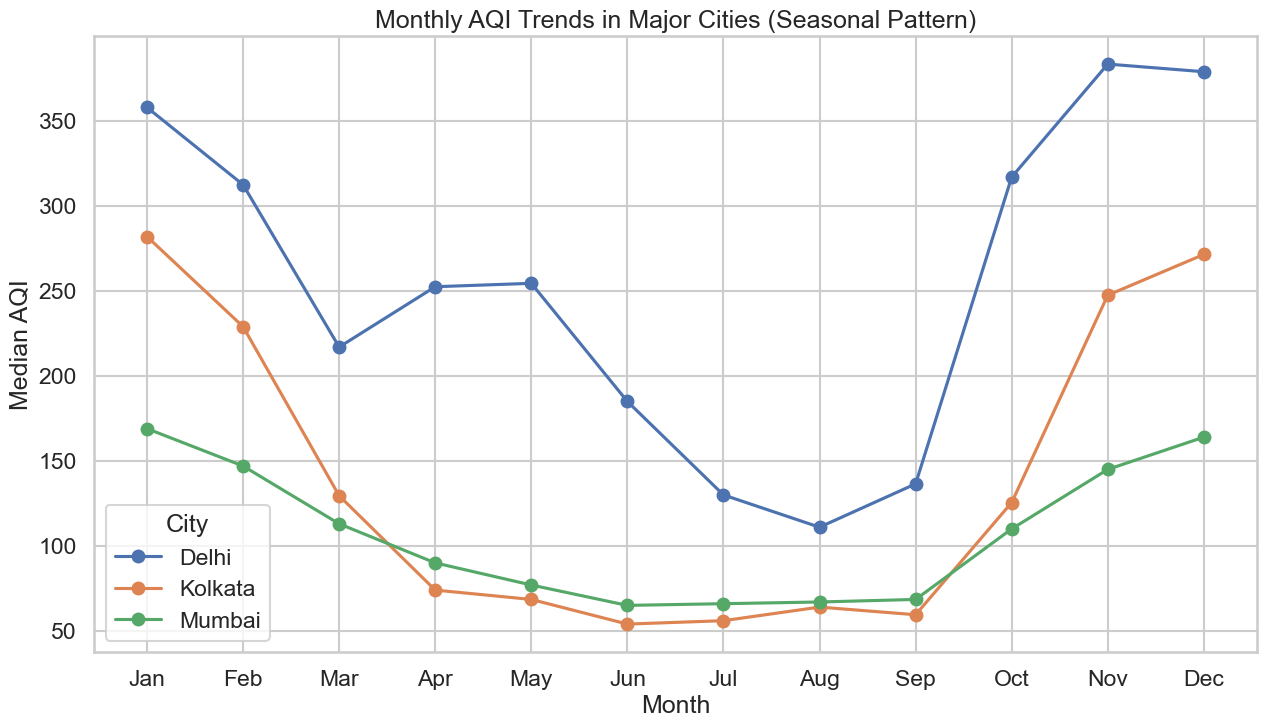

In [41]:
monthly_city_aqi.plot(kind='line', marker='o',
                      title='Monthly AQI Trends in Major Cities (Seasonal Pattern)')
plt.ylabel('Median AQI')
plt.xlabel('Month')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='City')
plt.show()

In [42]:
pollutant_cols = ['PM2.5', 'PM10', 'NO2', 'SO2']

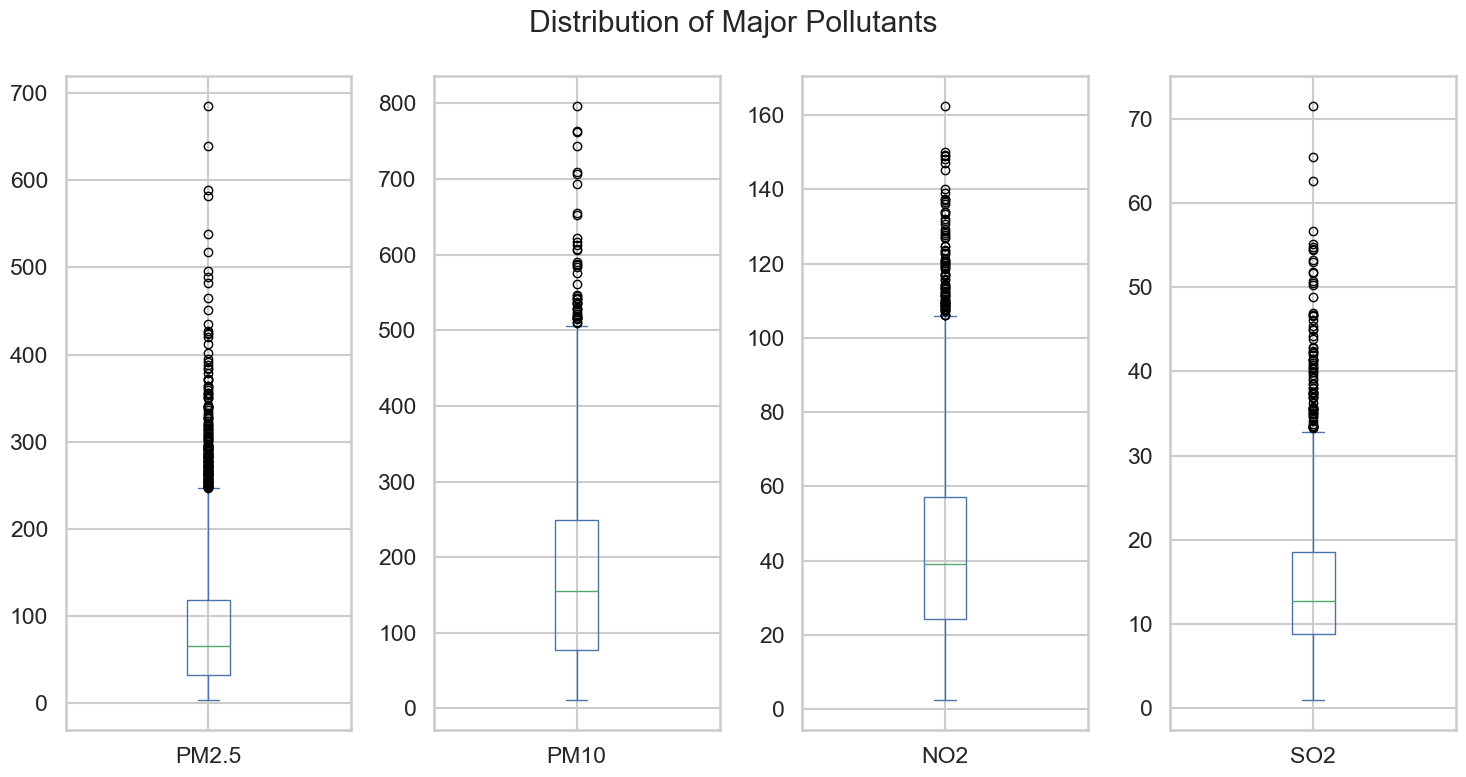

In [45]:
df_cities[pollutant_cols].plot(kind='box', subplots=True, layout=(1, 4),
                                 title='Distribution of Major Pollutants',
                                 sharey=False)
plt.tight_layout()
plt.show()

In [46]:
correlation_matrix = df_cities[pollutant_cols + ['CO', 'O3']].corr()

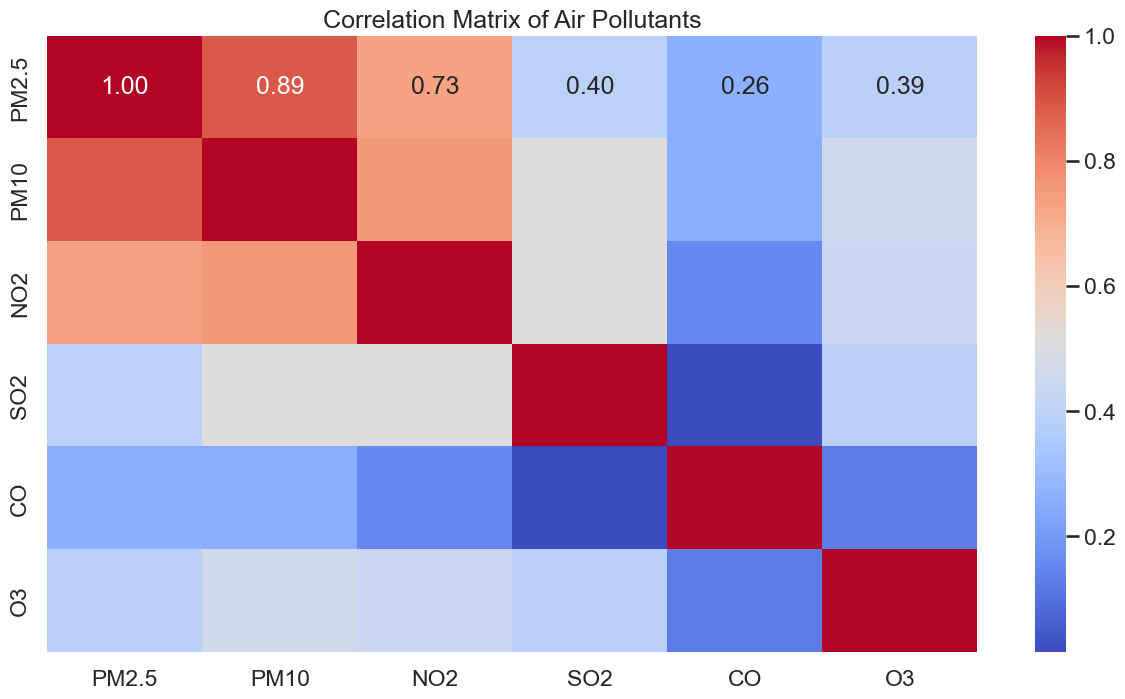

In [47]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Air Pollutants')
plt.show()